<a href="https://colab.research.google.com/github/Luantrannew/uni_project/blob/main/KNN_spamMail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQlk2BU8URQbWclk0Q3IHrCkhc97RQBRhb1TJt3Nl0drNIBiGcUQCA_Rn0gMyfeHAfWo_lArAt33u3j/pub?output=csv')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [ ]:
df.columns = ['label', 'text']

In [ ]:
spam_count = df[df['label'] == 'spam']['label'].count()
ham_count = df[df['label'] == 'ham']['label'].count()

print("Số lượng mẫu Spam:", spam_count)
print("Số lượng mẫu Ham:", ham_count)

Số lượng mẫu Spam: 747
Số lượng mẫu Ham: 4825


In [ ]:
desired_ham_count = spam_count  # Chọn số lượng mẫu ham bằng số mẫu spam
undersampled_df = pd.concat([
    df[df['label'] == 'spam'],
    df[df['label'] == 'ham'].sample(n=desired_ham_count, random_state=42)
])

# Thống kê số lượng mẫu spam và ham sau Undersampling
undersampled_spam_count = undersampled_df[undersampled_df['label'] == 'spam']['label'].count()
undersampled_ham_count = undersampled_df[undersampled_df['label'] == 'ham']['label'].count()

print("Số lượng mẫu Spam sau Undersampling:", undersampled_spam_count)
print("Số lượng mẫu Ham sau Undersampling:", undersampled_ham_count)

Số lượng mẫu Spam sau Undersampling: 747
Số lượng mẫu Ham sau Undersampling: 747


In [ ]:
undersampled_df['label'] = undersampled_df['label'].replace({'spam': 1, 'ham': 0})

In [ ]:
# Loại bỏ stopwords
stop_words = set(stopwords.words('english'))
undersampled_df['text'] = undersampled_df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if not word in stop_words]))

In [ ]:
undersampled_df.head(2)

,label,text
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...
5,1,FreeMsg Hey darling 's 3 week 's word back ! I...


In [ ]:
X = undersampled_df['text']
y = undersampled_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [ ]:
#trích xuất đặc trưng bằng CountVectorizer
cVect = CountVectorizer()
cVect.fit(X_train)
dtv_train = cVect.transform(X_train)
dtv_test = cVect.transform(X_test)

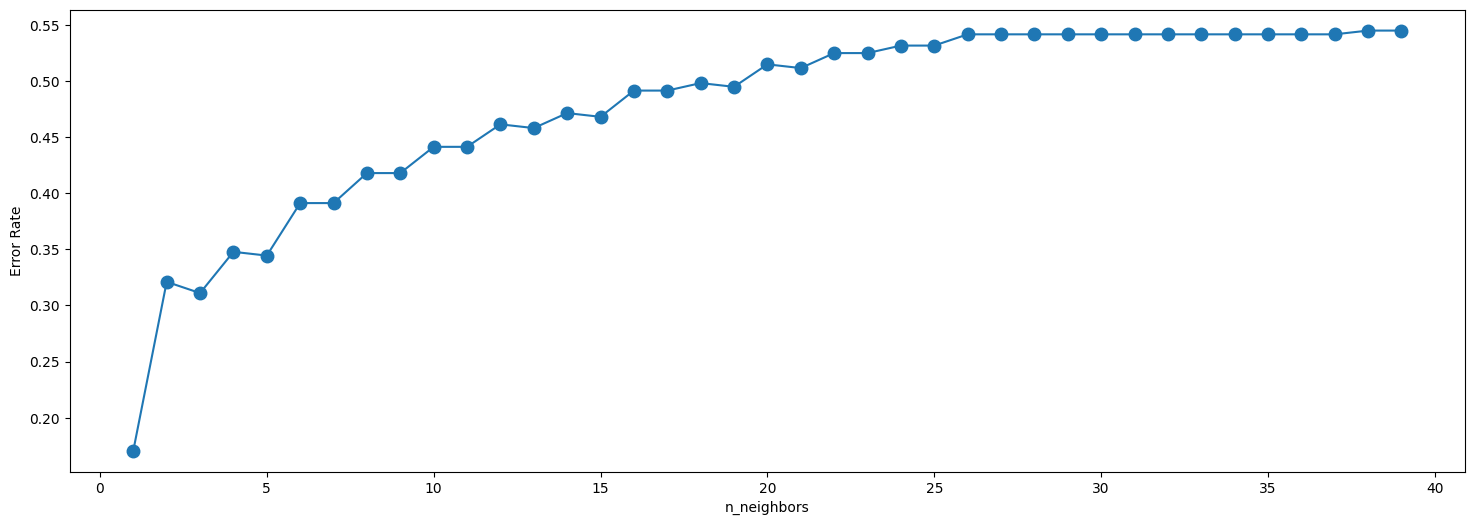

In [ ]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(dtv_train, y_train)
    pred = knn.predict(dtv_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(18,6))
plt.plot(range(1,40),error_rate, marker='o', markersize=9)
plt.xlabel('n_neighbors')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
# Xây dựng mô hình K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(dtv_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Đánh giá mô hình trên tập kiểm tra
y_pred = knn.predict(dtv_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8294314381270903


              precision    recall  f1-score   support

           0       0.73      1.00      0.84       136
           1       1.00      0.69      0.81       163

    accuracy                           0.83       299
   macro avg       0.86      0.84      0.83       299
weighted avg       0.88      0.83      0.83       299



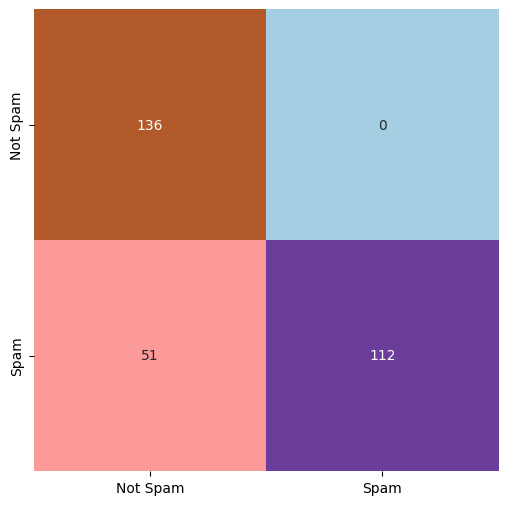

In [ ]:
# Báo cáo phân loại và ma trận nhầm lẫn
print(classification_report(y_test, y_pred))
cmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cmat, annot=True, cmap='Paired', cbar=False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.show()

In [ ]:
# Hàm dự đoán spam
def predict_spam(text):
    text = [' '.join([word for word in word_tokenize(text) if not word in stop_words])]
    t_dtv = cVect.transform(text).toarray()
    predicted_class = knn.predict(t_dtv)
    return predicted_class

# Nhập đoạn văn bản email từ người dùng
email_text = input("Nhập đoạn văn bản email: ")

# Dự đoán spam hoặc ham cho đoạn văn bản email
predicted_class = predict_spam(email_text)

# Hiển thị kết quả dự đoán
if predicted_class[0] == 1:
    print("Dự đoán đây là email Spam.")
else:
    print("Dự đoán đây là email Ham.")

Nhập đoạn văn bản email: I���m going to try for 2 months ha ha only joking
Dự đoán đây là email Ham.


In [ ]:
You're our lucky 1,000,000th visitor! Click here to claim your prize. You've won $1,000,000!